In [2]:
import pandas as pd
import faostat
import openpyxl

# Modeling Task
Analyze how food waste relates to each of the following three target nutrition indicators (with potential mediation by per-capita food supply):

- Dietary Energy Adequacy – The average dietary energy supply as a percentage of the population’s required energy needs.
- Prevalence of Undernourishment – The share of the population that is chronically undernourished (consuming less than the minimum dietary energy requirement).
- Prevalence of Obesity – The share of the adult population that is obese (BMI ≥ 30).
<br>Mediating Factor: Food Supply per Capita – The average food availability per person, measured in kilocalories per person per day.

Countries for Analysis
| Region/Type         | Country  | Rationale                                                  |
|---------------------|----------|-------------------------------------------------------------|
| EU (mandatory)      | Bulgaria | Transitioning food system, moderate waste issues            |
| High-income EU      | France   | Adequate diets, active waste-reduction policies             |
| High-income EU      | Germany  | High surplus, distinct obesity profile                      |
| Sub-Saharan Africa  | Nigeria  | High undernourishment, post-harvest losses                  |
| South Asia          | India    | Large undernourished population, growing obesity            |
| Latin America       | Brazil   | Rising obesity, emerging economy                            |
| North America       | USA      | Very high obesity & waste, low hunger                       |
| MENA                | Egypt    | High obesity, import-reliant, food insecurity               |
| Southeast Asia      | Vietnam  | Rapid dietary shift, changing waste patterns                |
| Latin America       | Mexico   | Obesity crisis, notable waste                               |


# Data download
Downloading the data from Faostat API

Datasets: <br>
- FBSH - Food Balances (-2013, old methodology and population)
- FBS - Food Balances (2010-)
- FS - Suite of Food Security Indicators - dependent variables are here

In [15]:
#High-income EU	France	Adequate diets, active waste-reduction policies - 68
#High-income EU	Germany	High surplus, distinct obesity profile - 79
#Sub-Saharan Africa	Nigeria	High undernourishment, post-harvest losses - 159
#South Asia	India	Large undernourished population, growing obesity
#Latin America	Brazil	Rising obesity, emerging economy
#North America	USA	Very high obesity & waste, low hunger
#MENA	Egypt	High obesity, import-reliant, food insecurity
#Southeast Asia	Vietnam	Rapid dietary shift, changing waste patterns - 2nd
#Latin America	Mexico	Obesity crisis, notable waste - 138

In [2]:
faostat.list_datasets()

[('code',
  'label',
  'date_update',
  'note_update',
  'release_current',
  'state_current',
  'year_current',
  'release_next',
  'state_next',
  'year_next'),
 ('QCL',
  'Crops and livestock products',
  '2025-06-11',
  'minor revision',
  '2024-12-20 / 2025-06-11',
  'final',
  '2023',
  '2025-12',
  'final',
  '2024'),
 ('QI',
  'Production Indices',
  '2025-02-03',
  '',
  '2025-02-03',
  'final',
  '2023',
  '2025-12',
  'final',
  '2024'),
 ('QV',
  'Value of Agricultural Production',
  '2025-02-03',
  '',
  '2025-02-03',
  'final',
  '2023',
  '2025-12',
  'final',
  '2024'),
 ('FS',
  'Suite of Food Security Indicators',
  '2025-03-27',
  'minor revision',
  '2024-07-24 / 2025-03-27',
  'final',
  '2023',
  '2025-07',
  'final',
  '2024'),
 ('FBS',
  'Food Balances (2010-)',
  '2024-07-19',
  '',
  '2024-07-19',
  'final',
  '2022',
  '2025-07',
  'final',
  '2023'),
 ('SCL',
  'Supply Utilization Accounts (2010-)',
  '2024-07-19',
  '',
  '2024-07-19',
  'final',
  '2022',


In [4]:
faostat.list_pars('FBS'), faostat.list_pars('FBSH'), faostat.list_pars('FS')

([('parameter code', 'coding_systems', 'subdimensions {code: meaning}'),
  ('area',
   ['M49', 'FAO', 'ISO2', 'ISO3'],
   {'countries': 'Countries',
    'regions': 'Regions',
    'specialgroups': 'Special Groups'}),
  ('element', [], {'elements': 'Elements'}),
  ('item', ['FBS', 'FAO'], {'items': 'Items', 'itemsagg': 'Items Aggregated'}),
  ('year', [], {'years': 'Years'})],
 [('parameter code', 'coding_systems', 'subdimensions {code: meaning}'),
  ('area',
   ['M49', 'FAO', 'ISO2', 'ISO3'],
   {'countries': 'Countries',
    'regions': 'Regions',
    'specialgroups': 'Special Groups'}),
  ('element', [], {'elements': 'Elements'}),
  ('item', ['FBS', 'FAO'], {'items': 'Items', 'itemsagg': 'Items Aggregated'}),
  ('year', [], {'years': 'Years'})],
 [('parameter code', 'coding_systems', 'subdimensions {code: meaning}'),
  ('area',
   ['M49', 'FAO', 'ISO2', 'ISO3'],
   {'countries': 'Countries',
    'regions': 'Regions',
    'specialgroups': 'Special Groups'}),
  ('element', [], {'elements

In [5]:
#Obtain the code for required features
faostat.get_par('FS', 'element'), faostat.get_par('FS', 'items'), faostat.get_par('FS', 'area'), faostat.get_par('FS', 'year3')

({'Value': '6120', 'Confidence interval': '6210'},
 {'Featured Indicators > (List)': '21054>',
  '-- Prevalence of undernourishment (percent)': '21004',
  '-- Number of people undernourished (million)': '21001',
  '-- Prevalence of severe food insecurity in the total population (percent)': '21040',
  '-- Prevalence of moderate or severe food insecurity in the total population (percent)': '21009',
  '-- Number of severely food insecure people (million)': '21007',
  '-- Number of moderately or severely food insecure people (million)': '21008',
  '-- Percentage of children under 5 years affected by wasting (percent)': '21026',
  '-- Number of children under 5 years affected by wasting (million)': '210260',
  '-- Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)': '21025',
  '-- Number of children under 5 years of age who are stunted (modeled estimates) (million)': '210250',
  '-- Percentage of children under 5 years of age who are overweight (model

In [16]:
faostat.get_par('FBSH', 'element'), faostat.get_par('FBSH', 'itemsagg'), faostat.get_par('FBSH', 'items'), faostat.get_par('FBSH', 'area')

({'Total Population - Both sexes': '511',
  'Production Quantity': '2510',
  'Import Quantity': '2610',
  'Stock Variation': '2071',
  'Export Quantity': '2910',
  'Domestic supply quantity': '2300',
  'Feed': '2520',
  'Seed': '2525',
  'Losses': '2120',
  'Processed': '2130',
  'Other uses (non-food)': '2151',
  'Tourist consumption': '5171',
  'Residuals': '5170',
  'Food': '2141',
  'Food supply quantity (kg/capita/yr)': '645',
  'Food supply (kcal/capita/day)': '664',
  'Protein supply quantity (g/capita/day)': '674',
  'Fat supply quantity (g/capita/day)': '684'},
 {'Grand Total + (Total)': '2901',
  'Grand Total > (List)': '2901>',
  'Vegetal Products + (Total)': '2903',
  'Vegetal Products > (List)': '2903>',
  'Animal Products + (Total)': '2941',
  'Animal Products > (List)': '2941>',
  'Cereals - Excluding Beer + (Total)': '2905',
  'Cereals - Excluding Beer > (List)': '2905>',
  'Starchy Roots + (Total)': '2907',
  'Starchy Roots > (List)': '2907>',
  'Sugar Crops + (Total)'

In [17]:
faostat.get_par('FBS', 'element'), faostat.get_par('FBS', 'itemsagg'), faostat.get_par('FBS', 'items'), faostat.get_par('FBS', 'area')

({'Total Population - Both sexes': '511',
  'Production Quantity': '2510',
  'Import quantity': '2610',
  'Stock Variation': '2071',
  'Export quantity': '2910',
  'Domestic supply quantity': '2300',
  'Feed': '2520',
  'Seed': '2525',
  'Losses': '2120',
  'Processed': '2130',
  'Other uses (non-food)': '2151',
  'Tourist consumption': '5171',
  'Residuals': '5170',
  'Food': '2141',
  'Food supply quantity (kg/capita/yr)': '645',
  'Food supply (kcal/capita/day)': '664',
  'Food supply (kcal)': '661',
  'Protein supply quantity (g/capita/day)': '674',
  'Protein supply quantity (t)': '671',
  'Fat supply quantity (g/capita/day)': '684',
  'Fat supply quantity (t)': '681'},
 {'Grand Total + (Total)': '2901',
  'Grand Total > (List)': '2901>',
  'Vegetal Products + (Total)': '2903',
  'Vegetal Products > (List)': '2903>',
  'Animal Products + (Total)': '2941',
  'Animal Products > (List)': '2941>',
  'Cereals - Excluding Beer + (Total)': '2905',
  'Cereals - Excluding Beer > (List)': '

__Obtain the mediator variables__ <br>
_FBS (new method) and FBSH (old method)_ <br>
Items:
- 'Grand Total + (Total)': '2901',
- 'Vegetal Products + (Total)': '2903',
- 'Animal Products + (Total)': '2941'

Elements:
- 'Total Population - Both sexes': '511'
- 'Food supply quantity (kg/capita/yr)': '645',
- 'Food supply (kcal/capita/day)': '664',
- 'Protein supply quantity (g/capita/day)': '674'
- 'Fat supply quantity (g/capita/day)': '684'
- 'Losses': '2120'

_Food Security data_ <br>
Items: <br>
- 'Prevalence of undernourishment (percent)': '21004',
- 'Number of people undernourished (million)': '21001',
- 'Prevalence of obesity in the adult population (18 years and older) (percent)': '21042',
- 'Number of obese adults (18 years and older) (million)': '210420',
- 'Average dietary energy supply adequacy (percent) (3-year average)': '21010',
- 'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)': '220001',
- 'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)': '22000',
- 'Minimum dietary energy requirement  (kcal/cap/day)': '21056',
- 'Average dietary energy requirement (kcal/cap/day)': '21057' <br>

Elements: <br>
- 'Value': '6120'
- 'Confidence interval': '6210'

__Obtain the predictor__ <br>
Because of API limitations we need to make a separate call for Losses, however API doesn't return all the food items, so we download the data from https://www.fao.org/faostat/en/#data . In case you want to try with API below are the keys. <br>

Items:
- 'Vegetal Products + (Total)': '2903',
- 'Vegetal Products > (List)': '2903>',
- 'Animal Products + (Total)': '2941',
- 'Animal Products > (List)': '2941>'

Elements:
- Losses: 2120

In [4]:
def download_data(area):
    mypars_FBS = {'area': area,
              'element': [511, 2120, 645, 664, 674, 684, 2300],
              'item': [2903, 2901, 2941] ,
              'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]}
    data_FBS = faostat.get_data_df('FBS', pars=mypars_FBS, strval=False)
    
    mypars_FBSH = {'area': area,
              'element': [511, 2120, 645, 664, 674, 684, 2300],
              'item': [2903, 2901, 2941] ,
              'year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]}
    data_FBSH = faostat.get_data_df('FBSH', pars=mypars_FBSH, strval=False)

    mypars_FS = {'area': area,
              'element': [6120, 6210],
              'item': [21004, 21001, 21042, 210420, 21010, 220001, 22000, 21056, 21057] ,
              'year3': [20233, 20223, 20213, 20203, 20193, 20183, 20173, 20163, 20153, 20143, 20133, 20123, 20113, 20103, 20093, 20083, 20073, 20063, 20053, 20043, 20033, 20023, 20013, 20003]}
    data_FS = faostat.get_data_df('FS', pars=mypars_FS, strval=False)
    print("Data has been downloaded.")
    return data_FBS, data_FBSH, data_FS

In [5]:
# Setting area code for Vietnam
data_FBS, data_FBSH, data_FS = download_data(area = 159)

Data has been downloaded.


In [8]:
data_FBSH['Element'].value_counts()

Element
Food supply (kcal/capita/day)             42
Protein supply quantity (g/capita/day)    42
Fat supply quantity (g/capita/day)        42
Name: count, dtype: int64

In [6]:
data_FS.head(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,FS,Suite of Food Security Indicators,159,Nigeria,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,120.0
1,FS,Suite of Food Security Indicators,159,Nigeria,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,120.0


In [7]:
data_FBSH.head(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,664,Food supply (kcal/capita/day),2901,Grand Total,2000,2000,kcal/cap/d,2610.0
1,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,664,Food supply (kcal/capita/day),2901,Grand Total,2001,2001,kcal/cap/d,2613.0


In [9]:
data_FBSH.dtypes

Domain Code      object
Domain           object
Area Code         int64
Area             object
Element Code      int64
Element          object
Item Code         int64
Item             object
Year Code         int64
Year             object
Unit             object
Value           float64
dtype: object

In [10]:
data_FBSH.shape, data_FBS.shape, data_FS.shape

((126, 12), (117, 12), (206, 12))

In [11]:
data_FBSH['Year'].unique(), data_FBS['Year'].unique(), data_FS['Year'].unique()

(array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
        '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object),
 array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
        '2018', '2019', '2020', '2021', '2022'], dtype=object),
 array(['2000-2002', '2001-2003', '2002-2004', '2003-2005', '2004-2006',
        '2005-2007', '2006-2008', '2007-2009', '2008-2010', '2009-2011',
        '2010-2012', '2011-2013', '2012-2014', '2013-2015', '2014-2016',
        '2015-2017', '2016-2018', '2017-2019', '2018-2020', '2019-2021',
        '2020-2022', '2021-2023', '2000', '2001', '2002', '2003', '2004',
        '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
        '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021', '2022', '2023'], dtype=object))

In [12]:
data_FBSH.isna().sum(), data_FBS.isna().sum(), data_FS.isna().sum()

(Domain Code     0
 Domain          0
 Area Code       0
 Area            0
 Element Code    0
 Element         0
 Item Code       0
 Item            0
 Year Code       0
 Year            0
 Unit            0
 Value           0
 dtype: int64,
 Domain Code     0
 Domain          0
 Area Code       0
 Area            0
 Element Code    0
 Element         0
 Item Code       0
 Item            0
 Year Code       0
 Year            0
 Unit            0
 Value           0
 dtype: int64,
 Domain Code     0
 Domain          0
 Area Code       0
 Area            0
 Element Code    0
 Element         0
 Item Code       0
 Item            0
 Year Code       0
 Year            0
 Unit            0
 Value           0
 dtype: int64)

In [13]:
data_FS.loc[data_FS.isnull().any(axis=1)].head(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value


In [29]:
#Download the datasets
#data_FBSH.to_excel("data_FBSH_gr.xlsx", index=False)
#data_FBS.to_excel("data_FBS_gr.xlsx", index=False)
#data_FS.to_excel("data_FS_gr.xlsx", index=False)

# Data preprocessing
- Includes transposing the items/elements for easier processing
- Deduplication of data
- Calculation of Total losses per year
- Merging required columns into one dataset

## Details
- FS data has 46 unique Years (3 year + 1 year data) <br>

# Food item matching
The Losses Value is provided per different food Items in FAOSTAT, we need to summed those to get the Total Losses per Year.
We are using two data sources due to the methodology of research changing during the course of time. Thus we will compare two datasets(FBSH and FBS) and check which food Items per year don't match.

**Decision:** We found there are differences in food Items from each methodology (FBS and FBSH). We concluded that the production, and demand for foods can change overtime because of this we have calculated the Total Food Losses value by summing all food Items losses value, regardless if there is mismatch for each year.

In [28]:
#Load data as this cannot be pulled with API
##Compare two datasets and check which Items (column Item) per year 2011(column Year) don't match.
FBSH_losses = pd.read_csv('/Users/aysun/Documents/fao-nutrition/Nigeria data/FAOSTAT_data_Nigeria_old.csv')
FBS_losses = pd.read_csv('/Users/aysun/Documents/fao-nutrition/Nigeria data/FAOSTAT_data_Nigeria_new.csv')
FBS_population = pd.read_csv('/Users/aysun/Documents/fao-nutrition/Nigeria data/FAOSTAT_data_Nigeria_population_new.csv')
FBSH_population = pd.read_csv('/Users/aysun/Documents/fao-nutrition/Nigeria data/FAOSTAT_data_Nigeria_population_old.csv')

In [29]:
FBSH_losses['Year'].unique(), FBS_losses['Year'].unique()

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013]),
 array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
        2021, 2022]))

In [30]:
FBSH_losses.shape, FBS_losses.shape

((420, 14), (490, 15))

In [31]:
FBS_losses.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),566,Nigeria,5123,Losses,S2511,Wheat and products,2010,2010,1000 t,82,I,Imputed value,NaN
1,FBS,Food Balances (2010-),566,Nigeria,5123,Losses,S2511,Wheat and products,2011,2011,1000 t,84,I,Imputed value,NaN


In [32]:
FBSH_losses.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBSH,"Food Balances (-2013, old methodology and popu...",566,Nigeria,5123,Losses,S2511,Wheat and products,2000,2000,1000 t,90,I,Imputed value
1,FBSH,"Food Balances (-2013, old methodology and popu...",566,Nigeria,5123,Losses,S2511,Wheat and products,2001,2001,1000 t,88,I,Imputed value


In [33]:
FBSH_losses_2011 = FBSH_losses[FBSH_losses['Year'] == 2011]
FBS_losses_2011 = FBS_losses[FBS_losses['Year'] == 2011]

# Check items in df1 that don't match in df2
items_in_df1_not_in_df2 = FBSH_losses_2011[~FBSH_losses_2011['Item'].isin(FBS_losses_2011['Item'])][['Item','Item Code (FBS)']]

# Check items in df2 that don't match in df1
items_in_df2_not_in_df1 = FBS_losses_2011[~FBS_losses_2011['Item'].isin(FBSH_losses_2011['Item'])][['Item','Item Code (FBS)']]

# Output the results
items_in_df2_not_in_df1

,Item,Item Code (FBS)
14,Rice and products,S2807
66,"Cereals, other",S2520
196,Groundnuts,S2552
248,Palm kernels,S2562
300,Onions,S2602
339,Plantains,S2616
378,Coffee and products,S2630
391,Cocoa Beans and products,S2633
417,"Spices, Other",S2645
439,"Offals, Edible",S2736


In [34]:
items_in_df1_not_in_df2

,Item,Item Code (FBS)
25,Rice (Milled Equivalent),S2805
81,"Cereals, Other",S2520
221,Groundnuts (Shelled Eq),S2556


# Deduplicate data
For some countries (example with Bulgaria) we noticed there are duplicated Items per year because of two reasons:
- The same Item has I (Imputed by receiver agency) and E (Estimated value) flag _(see below the definitions)_ - FBSH data, year 2011, S2949 Eggs, S2744	 Eggs
- Two Items with similar names, seemingly including the other - FBSH data, year 2011, S2911	Pulses, S2549	Pulses, Other and products
- **Decision**: Choose flag I, because all of the food items in FBS are with flag I, possibly the Estimated values aren't conclusive.

FAO definitions of flags I and E: <br>
<br>
__E - Estimated value__ - Observation obtained through an estimation methodology or based on the use of a limited amount of data (e.g. to produce a value at an early stage of the production stage while not all data are available). If needed, additional information can be provided through free text using the COMMENT_OBS attribute at the observation level or at a higher level (in SDMX-compliant environment). This code is also to be used when the estimation is done by a sender agency (and flagged as such). When the imputation is carried out by a receiver agency in order to replace or fill gaps in reported data series, the flag to use is I “Value imputed by a receiving agency”. <br>
__I - Value imputed by a receiving agency__ Observation imputed by a receiving agency to replace or fill gaps in reported data series. This code is intended to cover all cases where a receiving agency publishes data about a sending agency that do not come from an official source in the sender agency's reporting framework. When the estimation is done by the sender agency, the flag to use is E “Estimated value”.


In [35]:
FBSH_losses.loc[(FBSH_losses['Year'] == 2011) & (FBSH_losses['Item'] == 'Eggs')]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
403,FBSH,"Food Balances (-2013, old methodology and popu...",566,Nigeria,5123,Losses,S2744,Eggs,2011,2011,1000 t,32,I,Imputed value


In [36]:
FBSH_losses['Flag'].value_counts()

Flag
I    420
Name: count, dtype: int64

In [37]:
FBS_losses['Flag'].value_counts()

Flag
I    490
Name: count, dtype: int64

# Sum Losses per Item

In [38]:
def preprocessing(FBSH_losses_data, FBS_losses_data, FBSH_population, FBS_population, data_FBS, data_FBSH, data_FS):
    df_sorted_FSBH = FBSH_losses.sort_values(by=['Year', 'Item', 'Flag'], ascending=[True, True, False])

    # Drop duplicates, keeping the first (which will be 'I' if it exists)
    FBSH_losses_d = df_sorted_FSBH.drop_duplicates(subset=['Year', 'Item'], keep='first')

    total_losses_per_year_FBSH = FBSH_losses_d.groupby('Year')['Value'].sum().reset_index()
    total_losses_per_year_FBSH = total_losses_per_year_FBSH.rename(columns={'Value': 'Total Losses (1000 t)'})
    
    total_losses_per_year_FBS = FBS_losses.groupby('Year')['Value'].sum().reset_index()
    total_losses_per_year_FBS = total_losses_per_year_FBS.rename(columns={'Value': 'Total Losses (1000 t)'})
    
    # Merge the total losses back to the original df based on Year
    FBSH_losses_sum = pd.merge(FBSH_losses_d, total_losses_per_year_FBSH, on='Year', how='left')
    FBS_losses_sum = pd.merge(FBS_losses, total_losses_per_year_FBS, on='Year', how='left')

    # Drop unnecessary columns
    FBSH_losses_sum_reduced = FBSH_losses_sum.drop(columns=['Item','Item Code (FBS)', 'Value', 'Flag', 'Flag Description',], errors='ignore')
    FBS_losses_sum_reduced = FBS_losses_sum.drop(columns=['Item','Item Code (FBS)', 'Value', 'Flag', 'Flag Description',], errors='ignore')
    
    # Drop duplicate years, keeping the first occurrence
    FBSH_losses_sum_reduced = FBSH_losses_sum_reduced.drop_duplicates(subset='Year')
    FBS_losses_sum_reduced = FBS_losses_sum_reduced.drop_duplicates(subset='Year')

    # Prep final datasets
    # Pivot the FS table
    pivoted_FS = data_FS.pivot_table(
        index=['Domain Code', 'Domain', 'Area Code', 'Area', 'Year Code', 'Year'],
        columns='Item',
        values='Value',
        aggfunc='first'
    ).reset_index()

    #Pivot the FBSH table
    # Merge Total Losses (1000 t) to the rest of the data
    data_FBSH['Year'] = data_FBSH['Year'].astype(int)
    data_FBSH = pd.merge( data_FBSH, FBSH_losses_sum_reduced[['Year', 'Total Losses (1000 t)']], on='Year', how='left')
    
    # Create a combined column for Element + Item
    data_FBSH['Element_Item'] = data_FBSH['Element'] + "_" + data_FBSH['Item']
    
    # Pivot the table
    pivoted_FBSH = data_FBSH.pivot_table(
        index=['Domain Code', 'Domain', 'Area Code', 'Area', 'Year Code', 'Year', 'Total Losses (1000 t)'],
        columns='Element_Item',
        values='Value',
        aggfunc='first'
    ).reset_index()

    #Pivot the FBS table
    # Merge Total Losses (1000 t) to the rest of the data
    data_FBS['Year'] = data_FBS['Year'].astype(int)
    data_FBS = pd.merge( data_FBS, FBS_losses_sum_reduced[['Year', 'Total Losses (1000 t)']], on='Year', how='left')
    
    # Create a combined column for Element + Item
    data_FBS['Element_Item'] = data_FBS['Element'] + "_" + data_FBS['Item']
    
    # Pivot the table
    pivoted_FBS = data_FBS.pivot_table(
        index=['Domain Code', 'Domain', 'Area Code', 'Area', 'Year Code', 'Year', 'Total Losses (1000 t)'],
        columns='Element_Item',
        values='Value',
        aggfunc='first'
    ).reset_index()
    
    pivoted_FBS = pd.merge(pivoted_FBS, FBS_population[['Year', 'Value']], on='Year', how='left')
    pivoted_FBSH = pd.merge(pivoted_FBSH, FBSH_population[['Year', 'Value']], on='Year', how='left')
 
    #Total Losses (g/cap/day) = Total Losses (1000t) * 1000000g / Population (1000m) / 365 days of the year
    pivoted_FBS['Total Losses (g/cap/day)'] = ((pivoted_FBS['Total Losses (1000 t)']*1000000)/pivoted_FBS['Value']/365).round()
    pivoted_FBSH['Total Losses (g/cap/day)'] = ((pivoted_FBSH['Total Losses (1000 t)']*1000000)/pivoted_FBSH['Value']/365).round()

    #Drop duplicate years
    years_to_drop = [2010, 2011, 2012, 2013]
    pivoted_FBSH = pivoted_FBSH[~pivoted_FBSH['Year'].isin(years_to_drop)]

    #Concat datasets
    pivoted_FBS = pivoted_FBS[pivoted_FBSH.columns]
    final_1y = pd.concat([pivoted_FBSH, pivoted_FBS], ignore_index=True)
    final_1y.rename(columns={'Value': 'Population (1000no)'}, inplace=True)

    #Merge FS to FBS and FBSH datasets - 1 year aggregations features only (3y features are NAN)
    columns_to_merge = ['Year Code', 'Average dietary energy requirement (kcal/cap/day)',
       #'Average dietary energy supply adequacy (percent) (3-year average)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       #'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of obese adults (18 years and older) (million)',
       'Prevalence of obesity in the adult population (18 years and older) (percent)']
       #'Prevalence of undernourishment (percent) (3-year average)']
    
    FS_selected = pivoted_FS[columns_to_merge]
    final_1y = pd.merge(final_1y, FS_selected, on='Year Code', how='inner')

    #Turn the object data types into numeric
    final_1y[columns_to_merge] = final_1y[columns_to_merge].astype('float')
    
    #Calculate 3 year averages for merged_1y, sort rows
    final_1y = final_1y.sort_values("Year Code").reset_index(drop=True)

    # Columns to exclude from moving average
    exclude_cols = ["Area", "Area Code", "Year", "Year Code"]
    
    # Identify numeric columns to apply moving average
    numeric_cols = final_1y.select_dtypes(include='number').columns.difference(exclude_cols)
    
    # Apply the moving average
    df_ma = final_1y.copy()
    df_ma[numeric_cols] = (
        final_1y[numeric_cols]
        .rolling(window=3, center=False, min_periods=3)
        .mean()
        .round()
    )
    
    # Map Year Code from 3yr FS dataset to later merge the dependent variables to FBS/FBSH data
    df_ma["Year Code"] = df_ma["Year Code"].replace({
    2002: 20002002,
    2003: 20012003,
    2004: 20022004,
    2005: 20032005,
    2006: 20042006,
    2007: 20052007,
    2008: 20062008,
    2009: 20072009,
    2010: 20082010,
    2011: 20092011,
    2012: 20102012,
    2013: 20112013,
    2014: 20122014,
    2015: 20132015,
    2016: 20142016,
    2017: 20152017,
    2018: 20162018,
    2019: 20172019,
    2020: 20182020,
    2021: 20192021,
    2022: 20202022,
    })

    df_ma = pd.merge(
        df_ma,
        pivoted_FS[['Year Code',
                    'Average dietary energy supply adequacy (percent) (3-year average)',
                    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)',
                    'Prevalence of undernourishment (percent) (3-year average)']],  # only matching 'Year Code' used to filter
        on='Year Code',
        how='inner'
        )

    #Drop the years that can't have a 3yr average
    final_3y = df_ma[~df_ma['Year'].isin([2000, 2001])]

    # Replace '<2.5' with '2.5', then convert to float
    #final_3y['Prevalence of undernourishment (percent) (3-year average)'] = final_3y['Prevalence of undernourishment (percent) (3-year average)'].astype(str).str.replace(r'^[<>]\s*', '', regex=True).astype(float)

    final_3y.loc[:, 'Prevalence of undernourishment (percent) (3-year average)'] = (
    final_3y['Prevalence of undernourishment (percent) (3-year average)']
    .astype(str)
    .str.replace(r'^[<>]\s*', '', regex=True)
    .astype(float)
    )

    return pivoted_FS, pivoted_FBS, pivoted_FBSH, final_1y, final_3y

In [47]:
fs, fbs, fbsh, final_1y, final_3y = preprocessing(FBSH_losses, FBS_losses, FBSH_population, FBS_population, data_FBS, data_FBSH, data_FS)

In [46]:
fbs

,Domain Code,Domain,Area Code,Area,Year Code,Year,Total Losses (1000 t),Fat supply quantity (g/capita/day)_Animal Products,Fat supply quantity (g/capita/day)_Grand Total,Fat supply quantity (g/capita/day)_Vegetal Products,Food supply (kcal/capita/day)_Animal Products,Food supply (kcal/capita/day)_Grand Total,Food supply (kcal/capita/day)_Vegetal Products,Protein supply quantity (g/capita/day)_Animal Products,Protein supply quantity (g/capita/day)_Grand Total,Protein supply quantity (g/capita/day)_Vegetal Products,Value,Total Losses (g/cap/day)
0,FBS,Food Balances (2010-),159,Nigeria,2010,2010,12737,6.15,55.09,48.94,99.0,2572.0,2473.0,9.66,64.05,54.39,160952.85,217.0
1,FBS,Food Balances (2010-),159,Nigeria,2011,2011,12061,6.23,55.17,48.94,100.0,2560.0,2460.0,9.73,63.20,53.47,165463.75,200.0
2,FBS,Food Balances (2010-),159,Nigeria,2012,2012,15477,5.77,55.88,50.11,93.0,2546.0,2453.0,8.99,62.85,53.86,170075.93,249.0
3,FBS,Food Balances (2010-),159,Nigeria,2013,2013,13878,5.99,54.12,48.13,95.0,2521.0,2426.0,9.18,61.91,52.72,174726.12,218.0
4,FBS,Food Balances (2010-),159,Nigeria,2014,2014,15056,6.40,58.74,52.34,100.0,2576.0,2476.0,9.48,63.13,53.66,179379.02,230.0
5,FBS,Food Balances (2010-),159,Nigeria,2015,2015,15373,5.90,57.60,51.71,93.0,2568.0,2475.0,8.68,61.73,53.05,183995.79,229.0
6,FBS,Food Balances (2010-),159,Nigeria,2016,2016,15810,5.47,56.76,51.29,85.0,2558.0,2473.0,7.96,62.36,54.40,188666.93,230.0
7,FBS,Food Balances (2010-),159,Nigeria,2017,2017,15731,5.41,59.66,54.25,84.0,2556.0,2472.0,7.81,63.36,55.55,193495.91,223.0
8,FBS,Food Balances (2010-),159,Nigeria,2018,2018,15689,5.44,58.15,52.71,84.0,2532.0,2448.0,7.66,62.65,54.98,198387.62,217.0
9,FBS,Food Balances (2010-),159,Nigeria,2019,2019,15030,5.08,57.55,52.47,79.0,2540.0,2461.0,7.40,61.30,53.89,203304.49,203.0


In [40]:
final_1y.shape, final_3y.shape

((23, 23), (21, 26))

In [41]:
final_1y.shape, final_3y.shape

((23, 23), (21, 26))

In [42]:
final_1y.head(2)

,Domain Code,Domain,Area Code,Area,Year Code,Year,Total Losses (1000 t),Fat supply quantity (g/capita/day)_Animal Products,Fat supply quantity (g/capita/day)_Grand Total,Fat supply quantity (g/capita/day)_Vegetal Products,...,Protein supply quantity (g/capita/day)_Animal Products,Protein supply quantity (g/capita/day)_Grand Total,Protein supply quantity (g/capita/day)_Vegetal Products,Population (1000no),Total Losses (g/cap/day),Average dietary energy requirement (kcal/cap/day),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),Number of obese adults (18 years and older) (million),Prevalence of obesity in the adult population (18 years and older) (percent)
0,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,2000.0,2000,14227,5.16,59.57,54.41,...,7.20,58.88,51.68,122877.0,317.0,2180.0,2623.0,1693.0,2.9,4.7
1,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,2001.0,2001,14155,5.58,62.38,56.81,...,8.18,58.28,50.10,126005.0,308.0,2179.0,2626.0,1692.0,3.2,5.1


In [48]:
final_3y.head(2)

,Domain Code,Domain,Area Code,Area,Year Code,Year,Total Losses (1000 t),Fat supply quantity (g/capita/day)_Animal Products,Fat supply quantity (g/capita/day)_Grand Total,Fat supply quantity (g/capita/day)_Vegetal Products,...,Population (1000no),Total Losses (g/cap/day),Average dietary energy requirement (kcal/cap/day),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),Number of obese adults (18 years and older) (million),Prevalence of obesity in the adult population (18 years and older) (percent),Average dietary energy supply adequacy (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average),Prevalence of undernourishment (percent) (3-year average)
2,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,20002002.0,2002,14385.0,6.0,62.0,56.0,...,126036.0,313.0,2179.0,2622.0,1692.0,3.0,5.0,120.0,2622.0,8.8
3,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,20012003.0,2003,14834.0,6.0,63.0,57.0,...,129260.0,314.0,2178.0,2622.0,1692.0,4.0,5.0,120.0,2622.0,8.8


In [49]:
final_3y.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Year Code', 'Year',
       'Total Losses (1000 t)',
       'Fat supply quantity (g/capita/day)_Animal Products',
       'Fat supply quantity (g/capita/day)_Grand Total',
       'Fat supply quantity (g/capita/day)_Vegetal Products',
       'Food supply (kcal/capita/day)_Animal Products',
       'Food supply (kcal/capita/day)_Grand Total',
       'Food supply (kcal/capita/day)_Vegetal Products',
       'Protein supply quantity (g/capita/day)_Animal Products',
       'Protein supply quantity (g/capita/day)_Grand Total',
       'Protein supply quantity (g/capita/day)_Vegetal Products',
       'Population (1000no)', 'Total Losses (g/cap/day)',
       'Average dietary energy requirement (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of obese adults (18 years and older) (million)',
      

In [50]:
final_3y.head(2)

,Domain Code,Domain,Area Code,Area,Year Code,Year,Total Losses (1000 t),Fat supply quantity (g/capita/day)_Animal Products,Fat supply quantity (g/capita/day)_Grand Total,Fat supply quantity (g/capita/day)_Vegetal Products,...,Population (1000no),Total Losses (g/cap/day),Average dietary energy requirement (kcal/cap/day),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),Number of obese adults (18 years and older) (million),Prevalence of obesity in the adult population (18 years and older) (percent),Average dietary energy supply adequacy (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average),Prevalence of undernourishment (percent) (3-year average)
2,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,20002002.0,2002,14385.0,6.0,62.0,56.0,...,126036.0,313.0,2179.0,2622.0,1692.0,3.0,5.0,120.0,2622.0,8.8
3,FBSH,"Food Balances (-2013, old methodology and popu...",159,Nigeria,20012003.0,2003,14834.0,6.0,63.0,57.0,...,129260.0,314.0,2178.0,2622.0,1692.0,4.0,5.0,120.0,2622.0,8.8


In [51]:
#Download the edited datasets
final_1y.to_csv("final_1y_nigeria.csv", index=False)
final_3y.to_csv("final_3y_nigeria.csv", index=False)

# Data exploration
# Data visualization

In [54]:
germany_1y = pd.read_excel('/Users/aysun/Documents/fao-nutrition/Germany data/final_1y_germany.xlsx')
germany_3y = pd.read_excel('/Users/aysun/Documents/fao-nutrition/Germany data/final_3y.germany.xlsx')
vietnam_1y = pd.read_excel('/Users/aysun/Documents/fao-nutrition/Vietnam data/final_1y_vietnam.xlsx')
vietnam_3y = pd.read_excel('/Users/aysun/Documents/fao-nutrition/Vietnam data/final_3y_vietnam.xlsx')
nigeria_1y = pd.read_csv('/Users/aysun/Documents/fao-nutrition/Nigeria data/final_1y_nigeria.csv')
nigeria_3y = pd.read_csv('/Users/aysun/Documents/fao-nutrition/Nigeria data/final_3y_nigeria.csv')

In [55]:
germany_1y.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Year Code', 'Year',
       'Total Losses (1000 t)',
       'Fat supply quantity (g/capita/day)_Animal Products',
       'Fat supply quantity (g/capita/day)_Grand Total',
       'Fat supply quantity (g/capita/day)_Vegetal Products',
       'Food supply (kcal/capita/day)_Animal Products',
       'Food supply (kcal/capita/day)_Grand Total',
       'Food supply (kcal/capita/day)_Vegetal Products',
       'Protein supply quantity (g/capita/day)_Animal Products',
       'Protein supply quantity (g/capita/day)_Grand Total',
       'Protein supply quantity (g/capita/day)_Vegetal Products',
       'Population (1000no)', 'Total Losses (g/cap/day)',
       'Average dietary energy requirement (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of obese adults (18 years and older) (million)',
      

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_line_datasets(datasets, column, labels=None):
    """
    Plot multiple datasets as line plots over 'Year' for a given Y-axis column.

    Parameters:
    - datasets: list of pandas DataFrames
    - column: str, the name of the column to plot on the Y-axis
    - labels: list of str, optional labels for the datasets
    """
    plt.figure(figsize=(12, 6))

    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(datasets))]

    for i, df in enumerate(datasets):
        sns.lineplot(x=df['Year'], y=df[column], label=labels[i], marker='o')

    plt.title(column)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_multiple_columns(datasets, columns, labels=None):
    """
    Plot multiple columns across multiple datasets as separate line plots.
    
    Parameters:
    - datasets: list of pandas DataFrames
    - columns: list of str, names of columns to plot (Y-axis)
    - labels: list of str, optional custom labels for datasets (e.g., country names)
    """
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(datasets))]
    
    num_cols = len(columns)
    plt.figure(figsize=(12, 5 * num_cols))  # Adjust height per plot

    for idx, column in enumerate(columns, start=1):
        plt.subplot(num_cols, 1, idx)
        
        for i, df in enumerate(datasets):
            sns.lineplot(x=df['Year'], y=df[column], label=labels[i], marker='o')

        plt.title(column)
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()


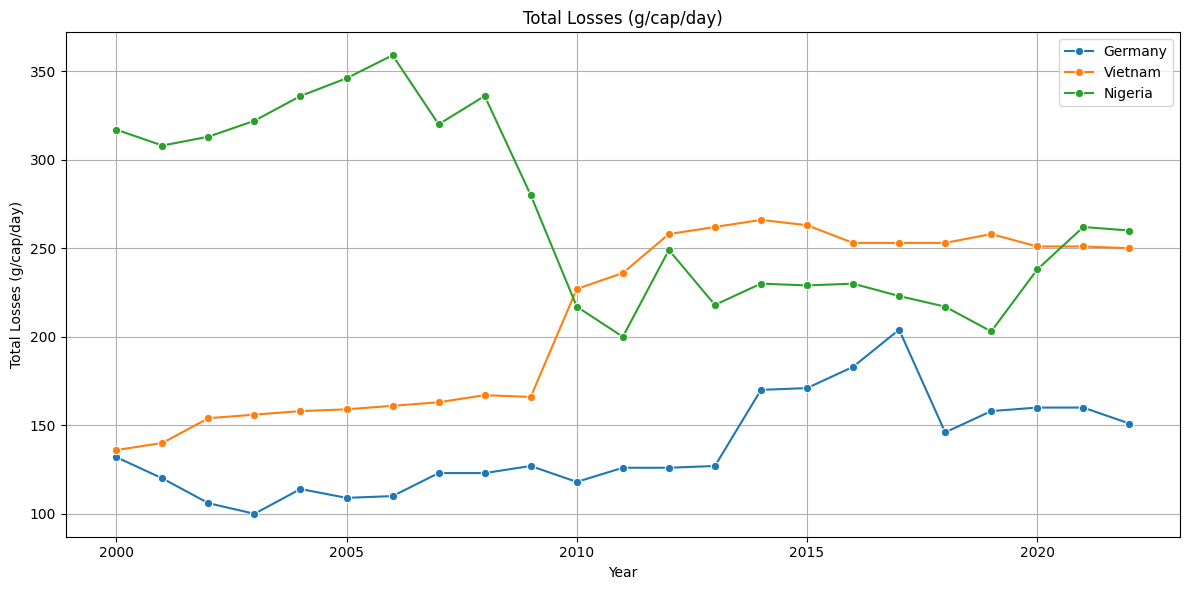

In [62]:
plot_line_datasets(
    datasets=[germany_1y, vietnam_1y, nigeria_1y],
    column='Total Losses (g/cap/day)',
    labels=['Germany', 'Vietnam', 'Nigeria']
)

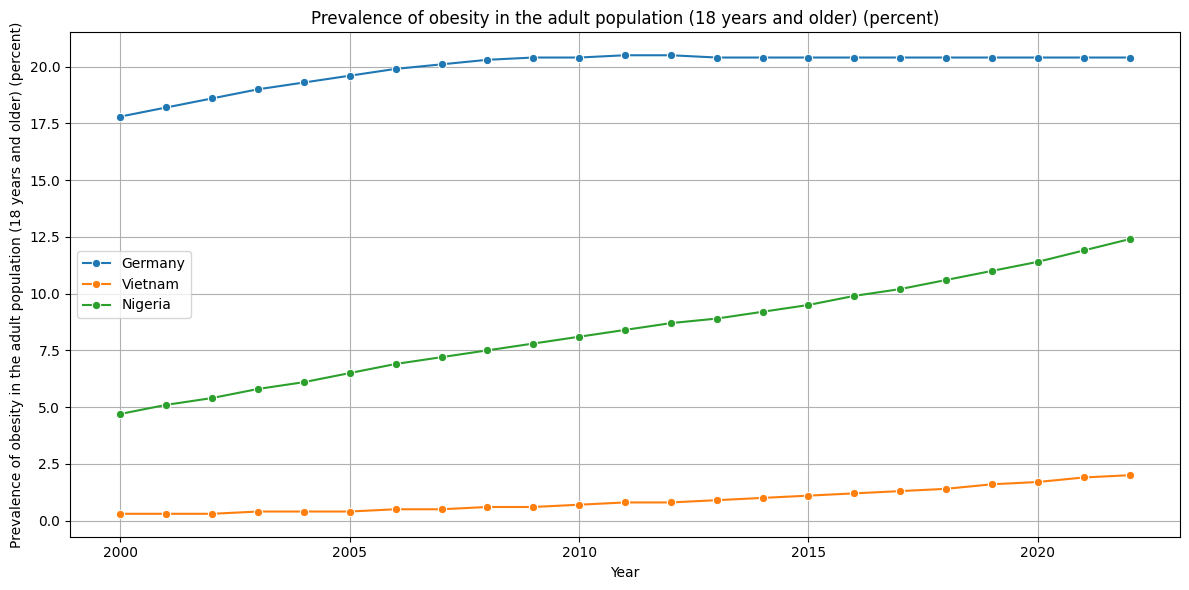

In [63]:
plot_line_datasets(
    datasets=[germany_1y, vietnam_1y, nigeria_1y],
    column='Prevalence of obesity in the adult population (18 years and older) (percent)',
    labels=['Germany', 'Vietnam', 'Nigeria']
)

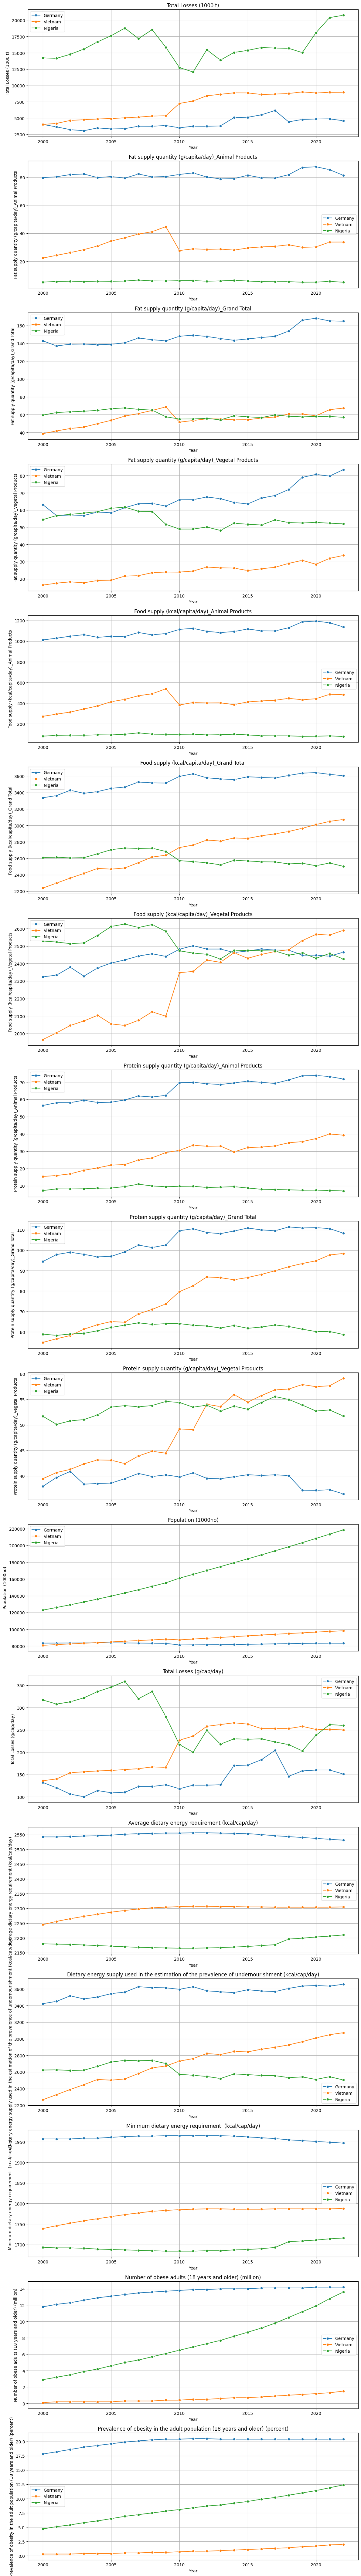

In [65]:
plot_multiple_columns(
    datasets=[germany_1y, vietnam_1y, nigeria_1y],
    columns=[
        'Total Losses (1000 t)',
       'Fat supply quantity (g/capita/day)_Animal Products',
       'Fat supply quantity (g/capita/day)_Grand Total',
       'Fat supply quantity (g/capita/day)_Vegetal Products',
       'Food supply (kcal/capita/day)_Animal Products',
       'Food supply (kcal/capita/day)_Grand Total',
       'Food supply (kcal/capita/day)_Vegetal Products',
       'Protein supply quantity (g/capita/day)_Animal Products',
       'Protein supply quantity (g/capita/day)_Grand Total',
       'Protein supply quantity (g/capita/day)_Vegetal Products',
       'Population (1000no)', 'Total Losses (g/cap/day)',
       'Average dietary energy requirement (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of obese adults (18 years and older) (million)',
       'Prevalence of obesity in the adult population (18 years and older) (percent)'
    ],
    labels=['Germany', 'Vietnam', 'Nigeria']
)

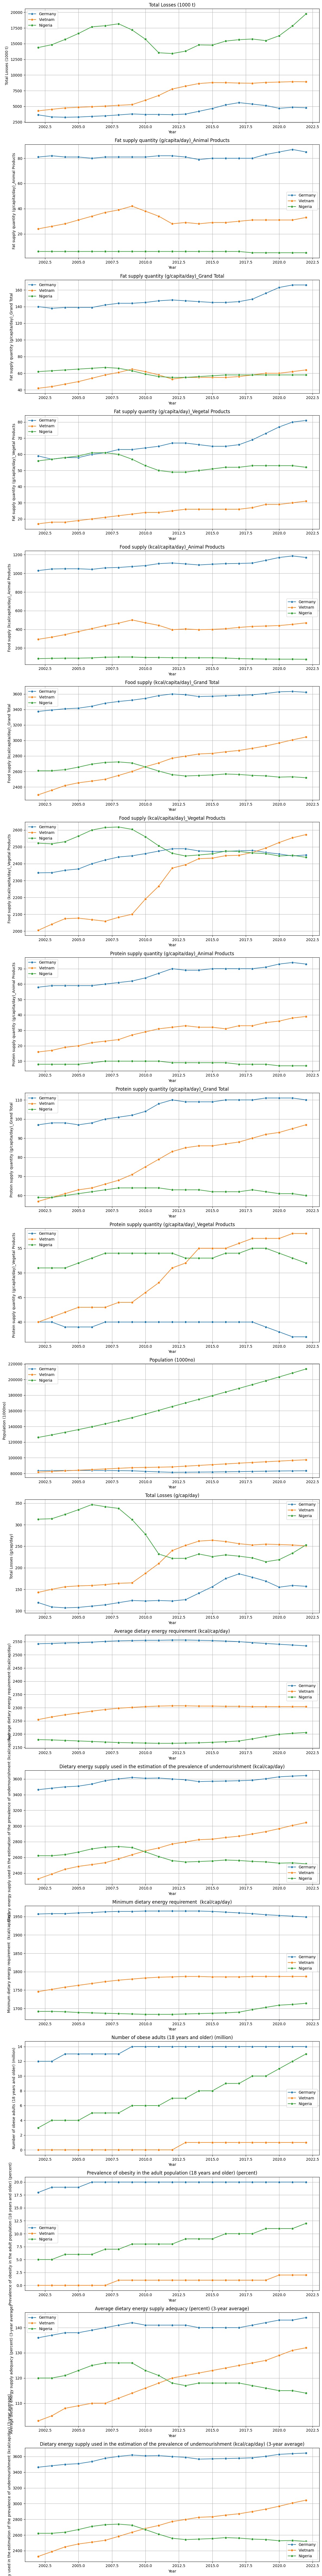

In [67]:
plot_multiple_columns(
    datasets=[germany_3y, vietnam_3y, nigeria_3y],
    columns=[
        'Total Losses (1000 t)',
       'Fat supply quantity (g/capita/day)_Animal Products',
       'Fat supply quantity (g/capita/day)_Grand Total',
       'Fat supply quantity (g/capita/day)_Vegetal Products',
       'Food supply (kcal/capita/day)_Animal Products',
       'Food supply (kcal/capita/day)_Grand Total',
       'Food supply (kcal/capita/day)_Vegetal Products',
       'Protein supply quantity (g/capita/day)_Animal Products',
       'Protein supply quantity (g/capita/day)_Grand Total',
       'Protein supply quantity (g/capita/day)_Vegetal Products',
       'Population (1000no)', 'Total Losses (g/cap/day)',
       'Average dietary energy requirement (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of obese adults (18 years and older) (million)',
       'Prevalence of obesity in the adult population (18 years and older) (percent)',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)'
    ],
    labels=['Germany', 'Vietnam', 'Nigeria']
)

In [66]:
germany_3y.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Year Code', 'Year',
       'Total Losses (1000 t)',
       'Fat supply quantity (g/capita/day)_Animal Products',
       'Fat supply quantity (g/capita/day)_Grand Total',
       'Fat supply quantity (g/capita/day)_Vegetal Products',
       'Food supply (kcal/capita/day)_Animal Products',
       'Food supply (kcal/capita/day)_Grand Total',
       'Food supply (kcal/capita/day)_Vegetal Products',
       'Protein supply quantity (g/capita/day)_Animal Products',
       'Protein supply quantity (g/capita/day)_Grand Total',
       'Protein supply quantity (g/capita/day)_Vegetal Products',
       'Population (1000no)', 'Total Losses (g/cap/day)',
       'Average dietary energy requirement (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of obese adults (18 years and older) (million)',
      

In [ ]:
#Food supply quantity